https://www.goes-r.gov/users/docs/PUG-L1b-vol3.pdf

temp  =  [ fk2 / (alog((fk1 / rad) + 1))  -  bc1 ] / bc2

In [ ]:
import xarray as xr
import metpy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
myFile = xr.open_dataset('../GOES_Files/test_files/OR_ABI-L1b-RadC-M3C07_G17_s20183261802189_e20183261804573_c20183261805001.nc')

rad = myFile.metpy.parse_cf('Rad')

fk1 = float(myFile.metpy.parse_cf('planck_fk1'))
fk2 = float(myFile.metpy.parse_cf('planck_fk2'))

bc1 = float(myFile.metpy.parse_cf('planck_bc1'))
bc2 = float(myFile.metpy.parse_cf('planck_bc2'))

In [27]:
temp = (fk2/(xr.ufuncs.log(fk1/rad + 1)) - bc1)/bc2

In [28]:
temp

<xarray.DataArray 'Rad' (y: 1500, x: 2500)>
array([[225.75351, 228.30757, 227.0817 , ..., 275.27597, 275.38428,
        275.70633],
       [224.30269, 224.30269, 227.0817 , ..., 275.38428, 275.4921 ,
        275.70633],
       [222.70198, 225.75351, 227.0817 , ..., 275.70633, 275.59946,
        275.16714],
       ...,
       [270.21393, 268.3954 , 264.9416 , ..., 298.8184 , 298.8184 ,
        298.8184 ],
       [265.61038, 263.72025, 260.84793, ..., 298.95135, 298.95135,
        298.8628 ],
       [262.9906 , 260.01273, 257.0454 , ..., 298.95135, 298.8628 ,
        299.03967]], dtype=float32)
Coordinates:
    t        datetime64[ns] 2018-11-22T18:03:38.174895104
  * y        (y) float32 4.588e+06 4.586e+06 4.584e+06 ... 1.586e+06 1.584e+06
  * x        (x) float32 -2.504e+06 -2.502e+06 -2.5e+06 ... 2.502e+06 2.504e+06
    y_image  float32 0.08624
    x_image  float64 0.0
    crs      object Projection: geostationary

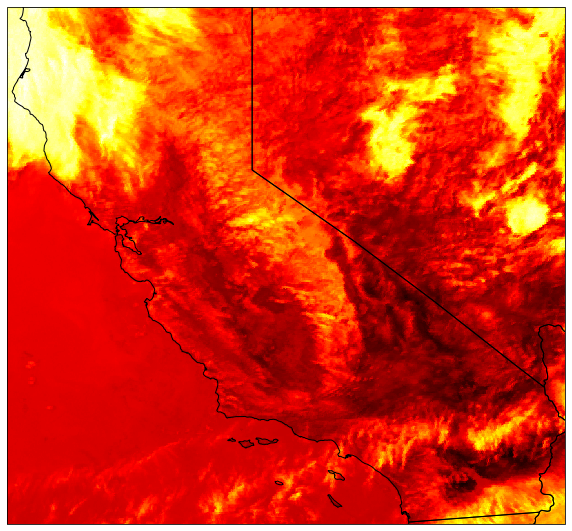

In [21]:
geos = temp.metpy.cartopy_crs
pc = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection=pc)

x = temp.x
y = temp.y

ax.set_extent([-124.50, -114.25, 32.50, 42.00], crs=pc)

ax.imshow(temp, origin='upper',
           extent=(x.min(), x.max(), y.min(), y.max()),
           transform=geos,
           interpolation='none',
           cmap = 'hot_r')
ax.add_feature(ccrs.cartopy.feature.STATES)